In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import pickle 
%matplotlib inline

In [2]:
pd.set_option('display.float_format',lambda x:'%.3f'%x)
pd.set_option('display.max_columns',15)

In [3]:
data=pd.read_csv('Used_Bikes.csv')
data


,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.000,Ahmedabad,17654.000,First Owner,3.000,110.000,TVS
1,Royal Enfield Classic 350cc,119900.000,Delhi,11000.000,First Owner,4.000,350.000,Royal Enfield
2,Triumph Daytona 675R,600000.000,Delhi,110.000,First Owner,8.000,675.000,Triumph
3,TVS Apache RTR 180cc,65000.000,Bangalore,16329.000,First Owner,4.000,180.000,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.000,Bangalore,10000.000,First Owner,3.000,150.000,Yamaha
...,...,...,...,...,...,...,...,...
32643,Hero Passion Pro 100cc,39000.000,Delhi,22000.000,First Owner,4.000,100.000,Hero
32644,TVS Apache RTR 180cc,30000.000,Karnal,6639.000,First Owner,9.000,180.000,TVS
32645,Bajaj Avenger Street 220,60000.000,Delhi,20373.000,First Owner,6.000,220.000,Bajaj
32646,Hero Super Splendor 125cc,15600.000,Jaipur,84186.000,First Owner,16.000,125.000,Hero


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32648 entries, 0 to 32647
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bike_name   32648 non-null  object 
 1   price       32648 non-null  float64
 2   city        32648 non-null  object 
 3   kms_driven  32648 non-null  float64
 4   owner       32648 non-null  object 
 5   age         32648 non-null  float64
 6   power       32648 non-null  float64
 7   brand       32648 non-null  object 
dtypes: float64(4), object(4)
memory usage: 2.0+ MB


In [5]:
data.describe()

,price,kms_driven,age,power
count,32648.000,32648.000,32648.000,32648.000
mean,68295.418,26344.625,8.048,213.511
std,90718.595,22208.528,4.032,134.429
min,4400.000,1.000,1.000,100.000
25%,25000.000,12000.000,5.000,150.000
50%,43000.000,20373.000,7.000,150.000
75%,80000.000,35000.000,10.000,220.000
max,1900000.000,750000.000,63.000,1800.000


In [6]:
data.describe(include=['O'])

,bike_name,city,owner,brand
count,32648,32648,32648,32648
unique,471,443,4,23
top,Bajaj Pulsar 150cc,Delhi,First Owner,Bajaj
freq,2776,7318,29964,11213


In [7]:
data.isna().sum()

bike_name     0
price         0
city          0
kms_driven    0
owner         0
age           0
power         0
brand         0
dtype: int64

In [8]:
pd.crosstab(index=data['brand'],columns=data['owner'],normalize=True,margins=True)

owner,First Owner,Fourth Owner Or More,Second Owner,Third Owner,All
brand,,,,,
BMW,0.000,0.000,0.000,0.000,0.000
Bajaj,0.318,0.000,0.025,0.001,0.343
Benelli,0.001,0.000,0.000,0.000,0.002
Ducati,0.001,0.000,0.000,0.000,0.001
Harley-Davidson,0.022,0.000,0.001,0.000,0.023
Hero,0.173,0.000,0.022,0.000,0.195
Honda,0.062,0.000,0.002,0.000,0.065
Hyosung,0.002,0.000,0.000,0.000,0.002
Ideal,0.000,0.000,0.000,0.000,0.000


In [9]:
data.corr(method='pearson')

,price,kms_driven,age,power
price,1.000,-0.314,-0.399,0.862
kms_driven,-0.314,1.000,0.485,-0.264
age,-0.399,0.485,1.000,-0.337
power,0.862,-0.264,-0.337,1.000


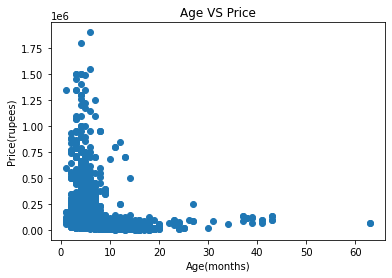

In [10]:
plt.scatter(data['age'],data['price'])
plt.title('Age VS Price')
plt.xlabel('Age(months)')
plt.ylabel('Price(rupees)')
plt.show()

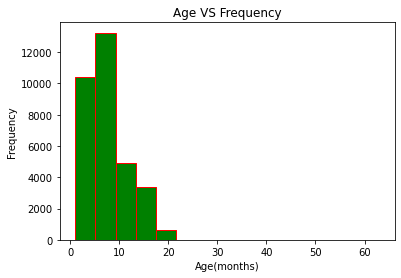

In [11]:
plt.hist(data['age'],color='green',edgecolor='red',bins=15)
plt.title('Age VS Frequency')
plt.xlabel('Age(months)')
plt.ylabel('Frequency')
plt.show()

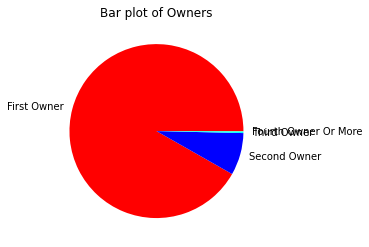

In [12]:
owners=data['owner'].value_counts().index
counts=data['owner'].value_counts().values
index=np.arange(len(owners))

plt.pie(counts,labels=owners,colors=['red','blue','cyan','yellow'])
plt.title('Bar plot of Owners')
plt.show()

<AxesSubplot:xlabel='age', ylabel='price'>

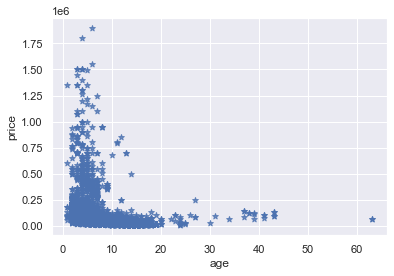

In [13]:
sns.set(style='darkgrid')
sns.regplot(x='age',y='price',data=data,fit_reg=False,marker='*')

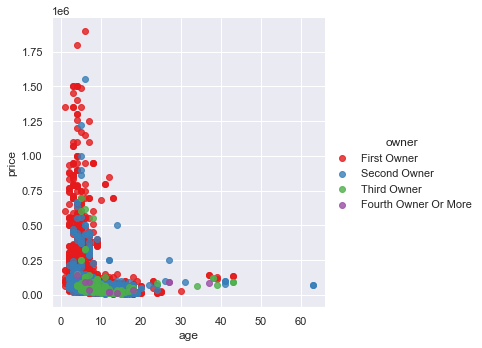

In [14]:
sns.lmplot(x='age',y='price',data=data,fit_reg=False,hue='owner',legend=True,palette='Set1')

C:\Users\hp\anaconda3\envs\project\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


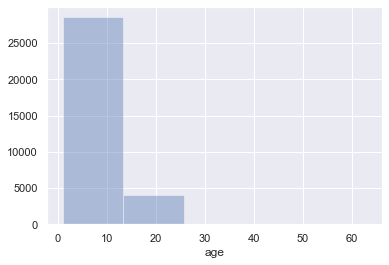

In [15]:
sns.distplot(data['age'],kde=False,bins=5)
plt.show()

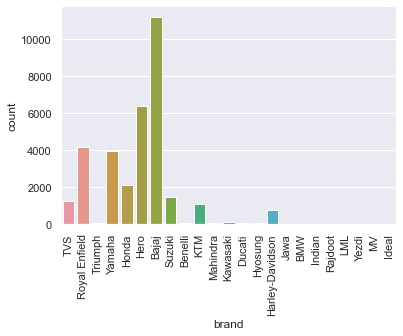

In [16]:
sns.countplot(x='brand',data=data)
plt.xticks(rotation=90)
plt.show()

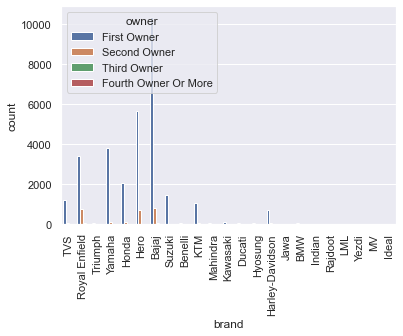

In [17]:
sns.countplot(x='brand',data=data,hue='owner')
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:ylabel='price'>

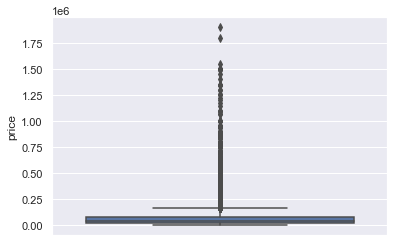

In [18]:
sns.boxplot(y=data['price'])

<AxesSubplot:xlabel='owner', ylabel='price'>

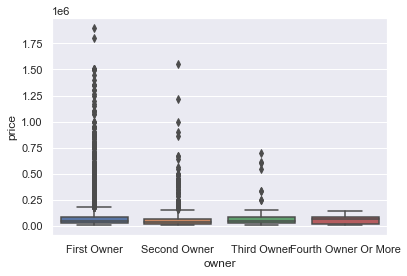

In [19]:
sns.boxplot(x=data['owner'],y=data['price'])

<AxesSubplot:xlabel='brand', ylabel='price'>

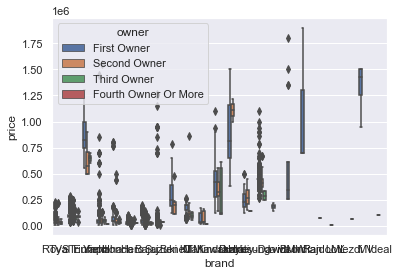

In [20]:
sns.boxplot(x=data['brand'],y=data['price'],hue=data['owner'])

C:\Users\hp\anaconda3\envs\project\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


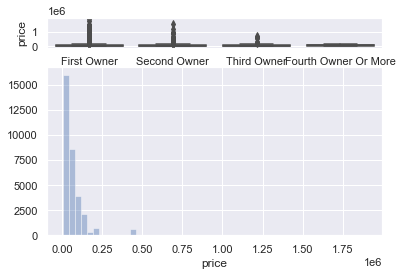

In [21]:
f,(ax_box,ax_hist)=plt.subplots(2,gridspec_kw={"height_ratios":(.15,.85)})
sns.boxplot(x=data['owner'],y=data['price'],ax=ax_box)
sns.distplot(data['price'],ax=ax_hist,kde=False)
plt.show()


In [22]:
#sns.pairplot(data,kind='scatter',hue='owner')
#plt.show()

In [23]:
#sns.heatmap(data.corr())

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics


In [25]:
data.drop('bike_name city'.split(),axis=1,inplace=True)
data

,price,kms_driven,owner,age,power,brand
0,35000.000,17654.000,First Owner,3.000,110.000,TVS
1,119900.000,11000.000,First Owner,4.000,350.000,Royal Enfield
2,600000.000,110.000,First Owner,8.000,675.000,Triumph
3,65000.000,16329.000,First Owner,4.000,180.000,TVS
4,80000.000,10000.000,First Owner,3.000,150.000,Yamaha
...,...,...,...,...,...,...
32643,39000.000,22000.000,First Owner,4.000,100.000,Hero
32644,30000.000,6639.000,First Owner,9.000,180.000,TVS
32645,60000.000,20373.000,First Owner,6.000,220.000,Bajaj
32646,15600.000,84186.000,First Owner,16.000,125.000,Hero


In [26]:
le_owner = LabelEncoder()
le_owner.fit(data['owner'].unique())
data['owner']=le_owner.transform(data['owner'])

In [27]:
le_brand = LabelEncoder()
le_brand.fit(data['brand'].unique())
data['brand']=le_brand.transform(data['brand'])

In [28]:
data

,price,kms_driven,owner,age,power,brand
0,35000.000,17654.000,0,3.000,110.000,19
1,119900.000,11000.000,0,4.000,350.000,17
2,600000.000,110.000,0,8.000,675.000,20
3,65000.000,16329.000,0,4.000,180.000,19
4,80000.000,10000.000,0,3.000,150.000,21
...,...,...,...,...,...,...
32643,39000.000,22000.000,0,4.000,100.000,5
32644,30000.000,6639.000,0,9.000,180.000,19
32645,60000.000,20373.000,0,6.000,220.000,1
32646,15600.000,84186.000,0,16.000,125.000,5


In [29]:
X=data.drop(['price'],axis='columns',inplace=False)
y=data['price']
y=np.log(y)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


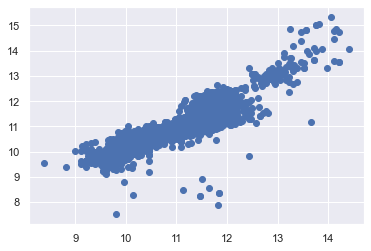

In [31]:
#linear regression
lm = LinearRegression()
lm.fit(X_train,y_train)
predictions = lm.predict(X_test)
plt.scatter(y_test,predictions)
plt.show()

C:\Users\hp\anaconda3\envs\project\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


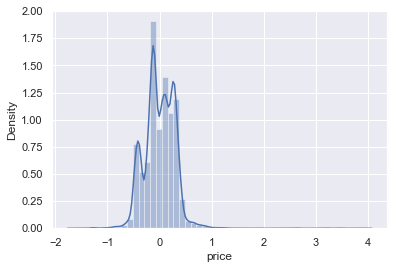

In [32]:
sns.distplot((y_test-predictions),bins=50);
plt.show()

In [33]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))




MAE: 0.2298955472424888
MSE: 0.08867787751526912
RMSE: 0.2977883099036447


In [34]:
#Random forest
rf=RandomForestRegressor(n_estimators=100,max_features='auto',max_depth=100,min_samples_split=10,min_samples_leaf=4,random_state=101)
model=rf.fit(X_train,y_train)
predictions=rf.predict(X_test)
print(np.e**predictions)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))





[18005.05515087 95497.92569586 34984.58437889 ... 22998.17195405
 23230.23858944 21993.68361436]
MAE: 0.04725599525783429
MSE: 0.014354781138792782
RMSE: 0.11981143993289115


In [37]:
pickle.dump([data,le_owner,le_brand,rf], open('model.pkl', 'wb' ))